<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/1104_HW_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **회귀**

**회귀 소개**

회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

머신러닝 회귀 예측의 핵심 : 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수(Regression Coefficients)**를 찾아내는 것

회귀 유형 구분 : 단일 회귀 / 다중 회귀 / 선형 회귀 / 비선형 회귀
![regression type](https://velog.velcdn.com/images/blueday4574/post/cb117908-f494-4fb6-99b7-b013dba432bf/image.png)

지도 학습 : 분류와 회귀 두 가지 유형으로 나뉨
* 분류 : 예측값이 카테고리 값 (이산값)
* 회귀 : 예측값이 숫자값 (연속값)

**대표적인 선형 회귀 모델**

* 일반 선형 회귀
* 릿지 (Ridge)
* 라쏘 (Lasso)
* 엘라스틱넷 (ElasticNet)
* 로지스틱 회귀 (Logistic Regression) : 분류에 사용되는 선형 모델, 매우 강력한 분류 알고리즘

## **단순 선형 회귀**

독립 변수, 종속 변수가 모두 하나인 회귀 모델

**RSS**

![Cost](https://blog.kakaocdn.net/dn/b09iYT/btrKvFYf8t6/IkNGsTmTiOB3TG7HvUZui1/img.png)

**교재에는 MSE를 RSS로 소개하고 있음*

머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 비용 함수(RSS, Cost)가 반환하는 값(=오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것

비용 함수를 loss function이라고도 함!

## **경사 하강법(Gradient Descent)**

**작동 원리**

반복적으로 비용 함수의 반환 값, 즉 예측값과 실제값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정함

오류값이 작아지지 않으면 그 오류값을 최소 비용으로 판단하고 그 때의 W 값을 최적 파라미터로 반환함

![Gradient Descent](https://miro.medium.com/max/1400/1*tQTcGTLZqnI5rp3JYO_4NA.png)

*편미분 결과값을 반복적으로 보정하면서 w1, w0 값을 업데이트하면 loss function이 최소가 되는 W 파라미터를 구할 수 있음*

* 업데이트 : $(새로운 w1) = (이전 w1) - (편미분 결과값)$
* 편미분 값이 너무 클 수 있으므로 보정 계수 learning rate를 곱함
* $(새로운 w1) = (이전 w1) - (learning_rate)*(편미분 결과값)$



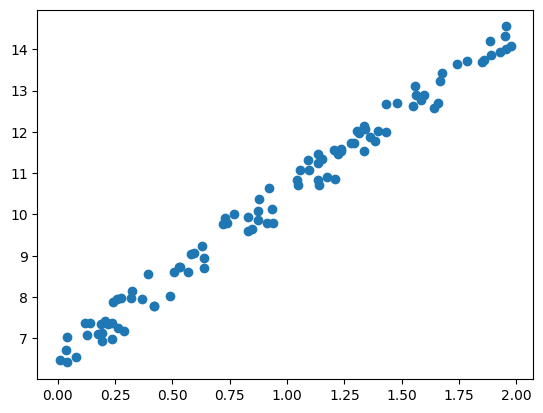

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4x+6 을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 생성
X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)

# 시각화
plt.scatter(X,y)

In [2]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [3]:
# 경사하강법 함수 생성
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 값 계산 및 실제 값과의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# w1, w0 업데이트를 반복적으로 수행
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
# 최종 예측값과 실제값의 RSS 차이를 계산하는 함수 생성
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


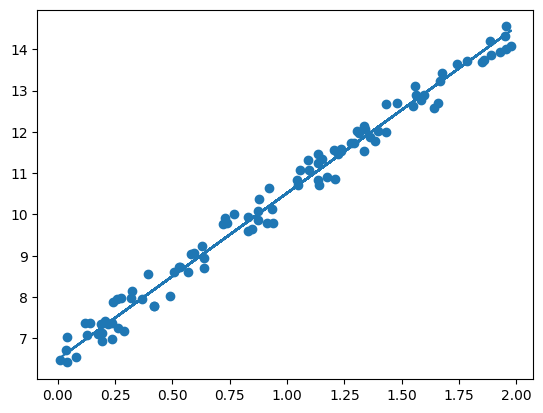

In [6]:
plt.scatter(X,y)
plt.plot(X, y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 함 > 수행 시간이 매우 오래 걸린다!

실전에서는 대부분 *확률적 경사 하강법(Stochastic Gradient Descent)*을 이용함



**확률적 경사 하강법**

일부 데이터만 이용하여 w가 업데이트 되는 값을 계산함 > 빠른 속도 보장

대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사하강법을 이용하여 최적 비용함수를 도출

In [8]:
# (미니 배치) 확률적 경사 하강법 함수 생성
# 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출하여 이를 기반으로 업데이트 값 계산

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 데이터를 추출
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Cost:0.0777


미니 배치 확률적 경사 하강법으로 구한 w0, w1은 경사 하강법으로 구한 값과 큰 차이가 없음 + 예측 오류 비용 또한 약간 높을 뿐 큰 예측 성능상의 차이가 없음

> 큰 데이터를 처리할 경우에 경사 하강법은 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용함

## **피처가 여러 개인 경우 회귀 계수 도출**

![design matrix](https://velog.velcdn.com/images%2Fyepark%2Fpost%2Ffe1bb30e-f928-40fd-acf9-6474a5569682%2F%ED%94%BC%EC%B2%98%EC%97%AC%EB%9F%AC%EA%B0%9C.PNG)

$Y hat = X * w1.T + w0$ 도 가능

## **사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

### **LinearRegression 클래스 - Ordinary Least Squares**

LinearRegression 클래스 : 예측값과 실제값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스

*입력 파라미터*
* fit_intercept : True (default) / False
    * intercept를 계산할 것인지를 결정, False로 설정할 경우 intercept = 0 으로 지정됨
* normalize : True / False (default)
    * 회귀를 수행하기 전 입력 데이터 세트를 정규화함

*속성*
* coef_ : 회귀 계수가 배열 형태로 저장됨 (Shape : (Target 개수, 피처 개수))
* intercept_ : intercept 값

OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음 ; 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐 > **"다중공선성(multi-collinearity)"**
'
일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용함

매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해 볼 수 있음


### **회귀 평가 지표**

![회귀 평가 지표](https://blog.kakaocdn.net/dn/drewIW/btsImIX2vP8/NjYBgO5J9NfICxBD0ODWOK/img.png)

**R square**

$R^2 = (예측값 Variance)/(실제값 Variance)$

**사이킷런 평가지표 API**

[평가 방법	| 사이킷런 평가 지표 API |	Scoring 함수 적용 값]
* MAE	: metrics.mean_absolute_error	| 'neg_mean_absolute_error'

* MSE	: metrics.mean_squared_error	| 'neg_mean_squared_error'
* RMSE	: metrics.mean_squared_error(False)	| 'neg_root_mean_squared_error'
* MSLE	: metrics.mean_squared_log_error | 	'neg_mean_squared_log_error'
* R²   : metrics.r2_score	| 'r2'

### **실습**

보스턴 주택 가격 데이터 피처 설명
* CRIM - per capita crime rate by town
*ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$ 10,000
* PTRATIO - pupil-teacher ratio by town
* B - 지역의 흑인 거주 비율
* LSTAT - % lower status of the population
* MEDV/PRICE - 본인 소유의 주택 가격(중앙값)

In [11]:
from io import IncrementalNewlineDecoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **데이터 로드 및 EDA**

In [16]:
# data load
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/housing.csv', header=None, delimiter=r'\s+', names=column_names)
print(boston.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [17]:
# DataFrame 형태로 변환
bostonDF = pd.DataFrame(boston)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
bostonDF.shape

(506, 14)

In [19]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Null 값은 없으며 정수형 피처 2개, 나머지는 모두 실수형

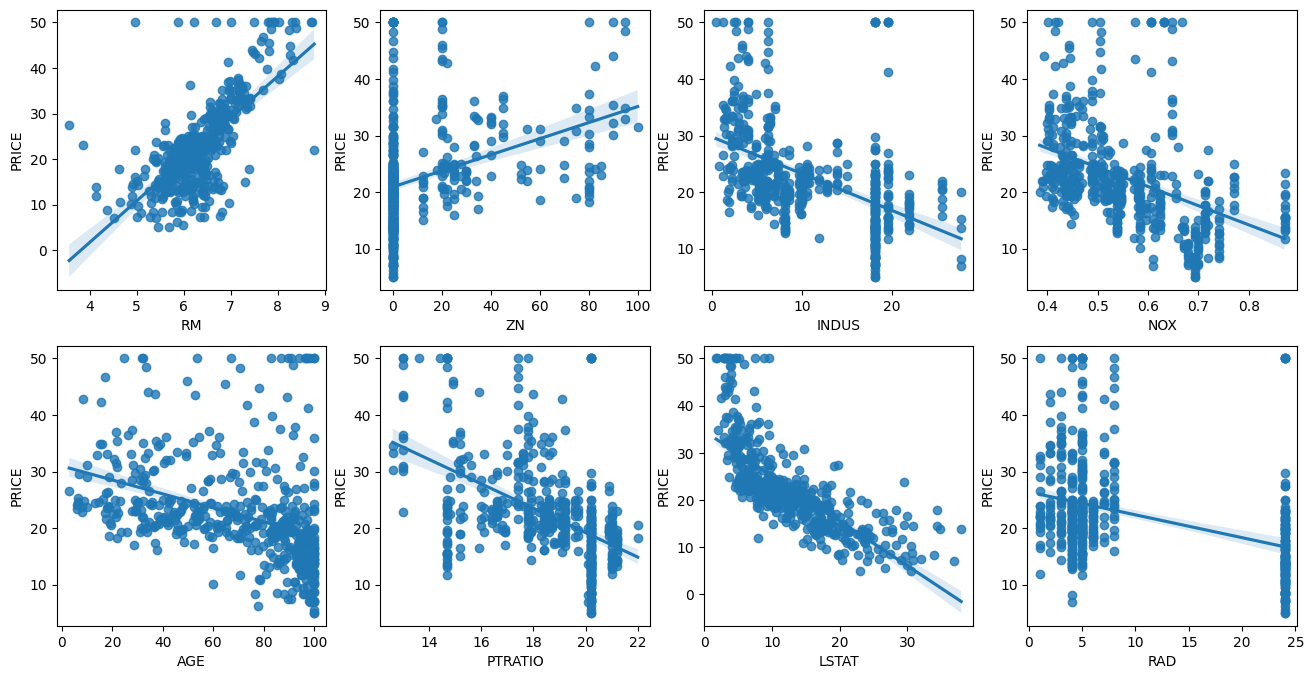

In [22]:
# 각 칼럼이 회귀 결과에 미치는 영향 시각화 : sns.regplot()

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 산점도, 선형 회귀 직선 함께 표현
    sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

'RM', 'LSTAT' 의 PRICE 영향도가 가장 두드러지게 나타남

* RM (방 개수) : 양의 선형성이 가장 큼. 방의 크기가 클수록 가격이 증가하는 모습을 보여줌
* LSTAT (하위 계층 비율) : 음 방향의 선형성이 가장 큼. 하위 계층의 비율이 작을수록 PRICE가 증가함

#### **회귀 모델 생성 및 파라미터 확인**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_preds, y_test)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score : 0.757


In [24]:
# intercept, coefficients 확인
print('절편값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [25]:
# 회귀 계수값 피처와 매핑
coeff = pd.Series(np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


#### **교차 검증 - cross_val_score()**

교차 검증으로 MSE, RMSE 측정

*사이킷런의 cross_val_score()은 scoring으로 RMSE를 제공하지 않으므로 MSE를 RMSE로 변환해야함*

In [26]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)
lr = LinearRegression()

# 5-fold 교차 검정
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt((-1)*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 fold 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print(' 5 fold 의 개별 RMSE scores : ', np.round(rmse_scores,2))
print(' 5 fold 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 fold 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 fold 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 fold 의 평균 RMSE : 5.829


## **다항 회귀와 과적합/과소적합 이해**

### **다항 회귀**

회귀가 독립변수의 단항시이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀 (Polynomial Regression) 라고 함

$y = w0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + x_5x_2^2$

*다항 회귀도 선형 회귀임! 선형/비선형을 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것*

#### **PolynomialFeatures 클래스**

- 사이킷런은 다항 회귀를 위한 클래스를 제공하지 않기 때문에 피처를 polynomial 피처로 변환해야 함

- degree 파라미터를 통해 단항식 피처를 다항식 피처로 변환함

- fit(), transform()을 통해 변환 수행

 ex. degree = 2 : $[x_1, x_2]  >  [1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$

In [28]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


**3차 다항 회귀 함수식 유도**

결정 함수식 : $y = 1 + 2x_1 + 3x_1^2 + 4x_2^3$

In [30]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [31]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


일차 단항식 계수 피처는 2개 였지만, 3차 다항식 polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남 > 회귀 계수도 10개로 늘어남

원래 다항식 $y = 1 + 2x_1 + 3x_1^2 + 4x_2^3$ 의 계수 값인 $[1,2,0,3,0,0,0,0,0,4]$ 와는 차이가 있지만 다항 회귀로 근사하고 있음

#### **Pipeline으로 한 번에 다항 회귀 구현**

피처 변환과 선형 회귀 적용을 별도로 하지 않고 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현할 수 있음

In [32]:
from sklearn.pipeline import Pipeline

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)  # 앞선 일차 단항식

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### **다항 회귀를 이용한 과소적합 및 과적합 이해**

* 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있음
* 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
* 하지만 degree를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져 과적합의 문제가 발생

In [33]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi* X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y : 코사인 기반의 true_fun()에서 약간의 노이즈 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다
Degree 1 MSE는 0.4077289625098685 입니다

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다
Degree 4 MSE는 0.04320874987232064 입니다

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다
Degree 15 MSE는 181238256.56423894 입니다


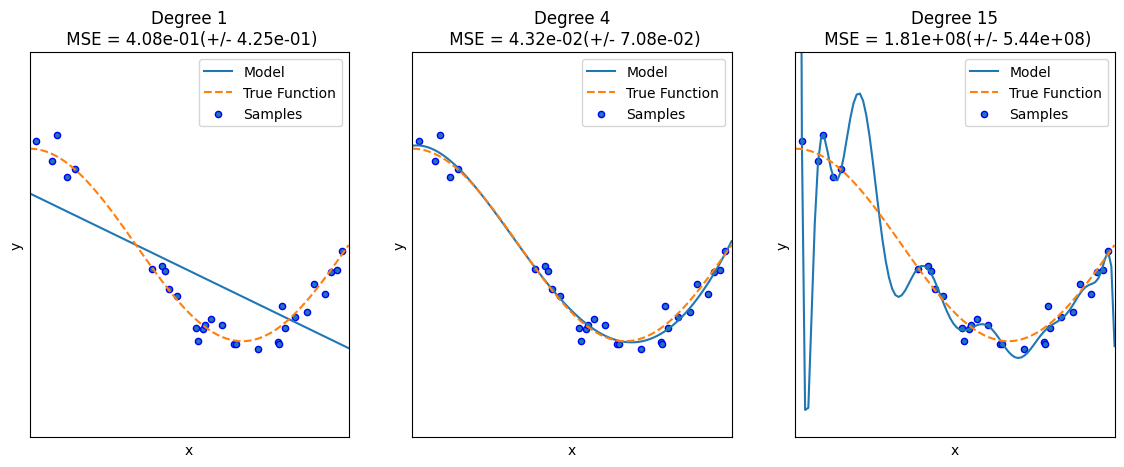

In [34]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1, 4, 15로 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)

    # named_steps : pipeline을 구성하는 세부 객체에 접근
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    X_test = np.linspace(0,1,100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), '--', label='True Function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

Degree 15 예측 곡선은 과적합이 심한 모델임 ; 터무니 없이 높은 MSE 값

### **편향-분산 트레이드 오프 (Bias-Variance Trade off)**

머신 러닝이 극복해야할 가장 중요한 이슈 중 하나

앞선 예제에서,
* Degree 1 : 매우 단순화된 모델, 지나치게 한 방향성으로 치우친 경향이 있음 > **고편향성 (High Bias)**
* Degree 15 : 학습 데이터 하나하나의 특성을 반영한 매우 복잡한 모델, 지나치게 높은 변동성 > **고분산성 (High Variance)**

일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있음
* 편향이 너무 높으면 전체 오류가 높음
* 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아짐
* 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨

 ![링크 텍스트](https://pbs.twimg.com/media/F6T2G9ybgAA2lOK.jpg:large)